In [7]:
#%%
import os
import shutil
import random
from site import execsitecustomize
import numpy as np
import pandas as pd
import sys

from datetime import datetime

import math

import matplotlib.pyplot as plt
import csv
import re



In [8]:
print("helloworld")

helloworld


In [9]:
# dirList = os.listdir('.')
# folders = [f for f in dirList if os.path.isdir(f)]
# folders.sort()
# for f in folders:
#     print(f'Folder: {f}')
#     if os.path.exists(f): 
#         evalRegionSampling(os.path.normpath(f))
#         print('----------------------------')
#     else:
#         print('folder does not seem to exist')
# # writeOutput(output, outFilePath)

In [49]:
# # folders = ["./T0.7_d20"]
# dirList = os.listdir('.')
# folders = [f for f in dirList if os.path.isdir(f)]

# for folder in folders:
#     dirList = os.listdir(folder)
#     scalarSamples = [f for f in dirList if 'scalquant_all_reg1' in f]
#     # print(dirList)
#     if len(scalarSamples) == 0:
#         print(f'no relevant files found in folder {folder}.')
#     else:
#         print(f"folder: {folder}")
#         for sample in scalarSamples:
#         # sample = scalarSamples[-1]
#             samplePath = os.path.join(folder, sample)
#             sampledf = pd.read_csv(samplePath, delimiter='\s+')

#             sampledf["rho[0]"].plot()
#     plt.show()


no relevant files found in folder ppls1.
no relevant files found in folder T0.7_d1_r112_r212_clean.
max timestep = 10000
folder: T0.7_d1_r112_r212
no relevant files found in folder _oldRuns.
no relevant files found in folder .git.


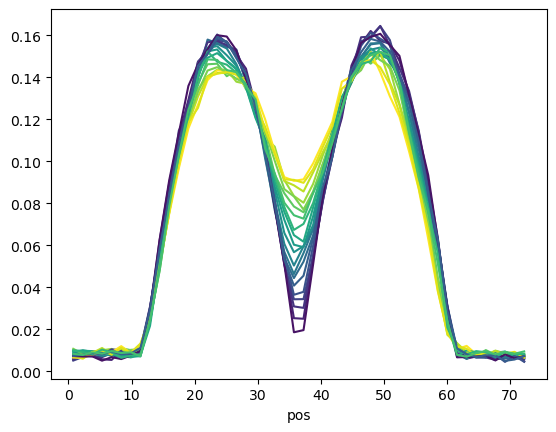

In [73]:
# folders = ["./T0.7_d20"]
dirList = os.listdir('.')
folders = [f for f in dirList if os.path.isdir(f)]


fig, ax = plt.subplots()
# ax2 = ax.twinx()



for folder in folders:
    dirList = os.listdir(folder)
    scalarSamples = [f for f in dirList if 'scalquant_all_reg1' in f]
    # print(dirList)
    if len(scalarSamples) == 0:
        print(f'no relevant files found in folder {folder}.')
    else:
        maxTimeStep =  int(re.findall(r'\d+', sorted(scalarSamples)[-1])[1])
        print(f'max timestep = {maxTimeStep}')

        print(f"folder: {folder}")
        for sample in scalarSamples:
        # sample = scalarSamples[-1]
            timeStep = int(re.findall(r'\d+', sample)[1]) 

            samplePath = os.path.join(folder, sample)
            sampledf = pd.read_csv(samplePath, delimiter='\s+')

            sampledf.plot(x="pos", y="rho[0]", ax=ax, c=plt.cm.viridis(timeStep/ maxTimeStep))
            ax.get_legend().remove()

        

no relevant files found in folder ppls1.
no relevant files found in folder T0.7_d1_r112_r212_clean.
max timestep = 10000
folder: T0.7_d1_r112_r212
no relevant files found in folder _oldRuns.
no relevant files found in folder .git.


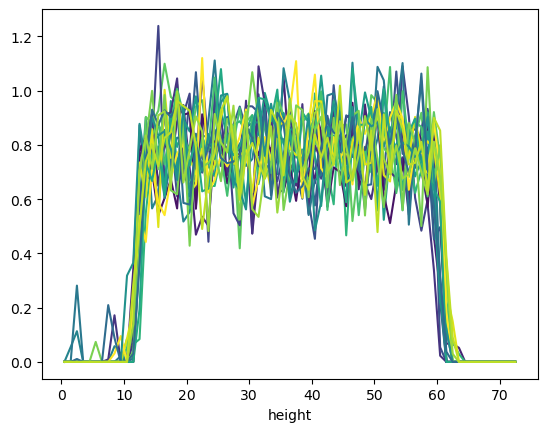

In [80]:
# folders = ["./T0.7_d20"]
dirList = os.listdir('.')
folders = [f for f in dirList if os.path.isdir(f)]




for folder in folders:
    dirList = os.listdir(folder)
    scalarSamples = [f for f in dirList if 'CylindricSampling' in f]
    # print(dirList)
    if len(scalarSamples) == 0:
        print(f'no relevant files found in folder {folder}.')
    else:
        fig, ax = plt.subplots()
        maxTimeStep =  int(re.findall(r'\d+', sorted(scalarSamples)[-1])[0])
        print(f'max timestep = {maxTimeStep}')

        print(f"folder: {folder}")
        for sample in scalarSamples:
        # sample = scalarSamples[-1]
            timeStep = int(re.findall(r'\d+', sample)[0]) 

            samplePath = os.path.join(folder, sample)
            sampledf = pd.read_csv(samplePath, delimiter='\s+')

            sampledf[sampledf["radius"]<1].plot(x="height", y="rho", ax=ax, c=plt.cm.viridis(timeStep/ maxTimeStep))
            ax.get_legend().remove()

        

In [11]:

def vle_kedia2006(T):
    '''
    Get saturated densities of DROPLET by Vrabec et al., Molecular Physics 104 (2006). Equation numbers refer this paper.
    :param float T: Temperature
    :return: float rhol, float rhov: Saturated liquid and vapor density
    '''
    Tc = 1.0779
    rc = 0.3190

    dT = (Tc-T)

    a,b,c=0.5649,0.1314,0.0413
    rhol=rc+a*dT**(1/3.)+b*dT+c*dT**(3/2.)       # equation 4
    a,b,c=0.5649,0.2128,0.0702
    rhov=rc-a*dT**(1/3.)+b*dT+c*dT**(3/2.)       # equation 5

    return rhol,rhov



In [12]:
vle_kedia2006(.7)

(0.7866611943875055, 0.007314397513485199)